## Project Overview
    - Title: cars_data
    - Brief Desciption: 
    - goal of this project: 


## Imports

In [1]:
# Standard libraries
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
import ipywidgets as widgets

# Configurations
pd.set_option('display.max_columns', None)  # Show all columns
sns.set_style('darkgrid')  # Set visualization style


## Load & Inspect Data

In [2]:
# Load dataset
df_vehicles = pd.read_csv('vehicles_us.csv',low_memory= False)

In [3]:
df_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
df_vehicles.isnull().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [5]:
df_vehicles.columns

Index(['price', 'model_year', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'transmission', 'type', 'paint_color', 'is_4wd',
       'date_posted', 'days_listed'],
      dtype='object')

In [6]:
df_vehicles.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [7]:
# df_vehicles['model_year'].max()
# df_vehicles['model_year'].min()

### Conclusion: The dataset has missing values and mixed data types that need cleaning.

## Data Cleaning & Transformation

In [8]:
# Handling 'model_year'
df_vehicles['model_year'] = df_vehicles['model_year'].fillna(df_vehicles.groupby(['model'])['model_year'].transform('median'))  

# missing odometer values
df_vehicles['odometer'] = df_vehicles['odometer'].fillna(df_vehicles.groupby('model')['odometer'].transform('median'))
# missing cylinder values
df_vehicles['cylinders'] = df_vehicles['cylinders'].fillna(df_vehicles.groupby('model')['cylinders'].transform('median'))

In [9]:
df_vehicles.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,121928.0,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [10]:
df_vehicles.duplicated().sum()
# df_vehicles['cylinders'].isna().sum()

np.int64(0)

In [11]:
# Convert data types
df_vehicles['model_year'] = df_vehicles['model_year'].astype('int64')
df_vehicles['odometer'] = df_vehicles['odometer'].fillna(0).astype('int64')
df_vehicles['cylinders'] = df_vehicles['cylinders'].astype('int64')

df_vehicles['date_posted'] = pd.to_datetime(df_vehicles['date_posted']) 

df_vehicles.rename(columns={
    'odometer': 'odometer_miles',
    'date_posted': 'listing_date'
}, inplace=True)

# Split 'model' column into 'make' and 'model'
df_vehicles[['make', 'model']] = df_vehicles['model'].str.split(' ', n=1, expand=True)


## Restoring Missing Data

In [12]:
# Restoring Missing Data
# Handling 'is_4WD', and 'high_mileage'
df_vehicles['is_4wd'] = df_vehicles['is_4wd'].fillna(0).astype(bool)

# Handling paint_color
df_vehicles['paint_color'] = df_vehicles['paint_color'].fillna('Unknown')


In [13]:
df_vehicles.head()

,price,model_year,model,condition,cylinders,fuel,odometer_miles,transmission,type,paint_color,is_4wd,listing_date,days_listed,make
0,9400,2011,x5,good,6,gas,145000,automatic,SUV,Unknown,True,2018-06-23,19,bmw
1,25500,2011,f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,ford
2,5500,2013,sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,hyundai
3,1500,2003,f-150,fair,8,gas,121928,automatic,pickup,Unknown,False,2019-03-22,9,ford
4,14900,2017,200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,chrysler


## Handling Missing Data 

**question to the reviewer**: why replacing the odometer values with the median? won't this action jeopardize our analysis? replacing the missing value with the median wont affect the accuracy? 


**For data consistency, we addressed missing values in our dataset using the following approaches:**  

    - is_4WD: missing values assumed to be non-4WD vehicles and filled with 0 (converted to boolean).
    - paint_color: missing values replaced with 'Unknown'.
    - model: split to two columns: 'model' and 'mark', to improve data organization and allow better filtering and analysis. Our dataset now contains:  
        **`make`: car manufacturer (ex: "bmw", "acura", ...).  
        **`model`: the specific model name of the car (ex: "f-150", ...).  
    - model_year: missing values replaced with the **median model year** of the same model. This method ensures that similar cars from different years have reasonable estimates.  
    - cylinders: filled missing values with the median number of cylinders. 
    - odometer: filled missing values with the median odometer value. 

In [14]:
df_vehicles.head(5)

,price,model_year,model,condition,cylinders,fuel,odometer_miles,transmission,type,paint_color,is_4wd,listing_date,days_listed,make
0,9400,2011,x5,good,6,gas,145000,automatic,SUV,Unknown,True,2018-06-23,19,bmw
1,25500,2011,f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,ford
2,5500,2013,sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,hyundai
3,1500,2003,f-150,fair,8,gas,121928,automatic,pickup,Unknown,False,2019-03-22,9,ford
4,14900,2017,200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,chrysler


In [15]:
df_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   price           51525 non-null  int64         
 1   model_year      51525 non-null  int64         
 2   model           51525 non-null  object        
 3   condition       51525 non-null  object        
 4   cylinders       51525 non-null  int64         
 5   fuel            51525 non-null  object        
 6   odometer_miles  51525 non-null  int64         
 7   transmission    51525 non-null  object        
 8   type            51525 non-null  object        
 9   paint_color     51525 non-null  object        
 10  is_4wd          51525 non-null  bool          
 11  listing_date    51525 non-null  datetime64[ns]
 12  days_listed     51525 non-null  int64         
 13  make            51525 non-null  object        
dtypes: bool(1), datetime64[ns](1), int64(5), object(7)
mem

## Exploratory Data Analysis

In [16]:
df_vehicles.describe()

,price,model_year,cylinders,odometer_miles,listing_date,days_listed
count,51525.000000,51525.000000,51525.000000,51525.000000,51525,51525.00000
mean,12132.464920,2009.793557,6.121067,115246.276468,2018-10-25 01:57:46.270742528,39.55476
min,1.000000,1908.000000,3.000000,0.000000,2018-05-01 00:00:00,0.00000
25%,5000.000000,2007.000000,4.000000,77000.000000,2018-07-29 00:00:00,19.00000
50%,9000.000000,2011.000000,6.000000,115256.000000,2018-10-25 00:00:00,33.00000
75%,16839.000000,2014.000000,8.000000,148177.000000,2019-01-21 00:00:00,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,2019-04-19 00:00:00,271.00000
std,10040.803015,6.099381,1.657457,60701.689701,NaN,28.20427


In [17]:
df_vehicles['fuel'].value_counts()

fuel
gas         47288
diesel       3714
hybrid        409
other         108
electric        6
Name: count, dtype: int64

In [18]:
df_vehicles['condition'].value_counts()

condition
excellent    24773
good         20145
like new      4742
fair          1607
new            143
salvage        115
Name: count, dtype: int64

In [19]:
df_vehicles['transmission'].value_counts()

transmission
automatic    46902
manual        2829
other         1794
Name: count, dtype: int64

### Conclusion: Most cars use gasoline, conditions vary significantly, with 'excellent' ahead, and automatic transmission is the most common.

## Correlation Analysis

In [20]:
# correlation analysis
numeric_df_vehicles = df_vehicles.select_dtypes(include=['number'])  
numeric_df_vehicles 

,price,model_year,cylinders,odometer_miles,days_listed
0,9400,2011,6,145000,19
1,25500,2011,6,88705,50
2,5500,2013,4,110000,79
3,1500,2003,8,121928,9
4,14900,2017,4,80903,28
...,...,...,...,...,...
51520,9249,2013,6,88136,37
51521,2700,2002,4,181500,22
51522,3950,2009,4,128000,32
51523,7455,2013,4,139573,71


In [21]:
# Compute correlation matrix
corr_matrix_vehicles = numeric_df_vehicles.corr()
corr_matrix_vehicles

,price,model_year,cylinders,odometer_miles,days_listed
price,1.000000,0.412969,0.300342,-0.388691,-0.000682
model_year,0.412969,1.000000,-0.148119,-0.433870,-0.005321
cylinders,0.300342,-0.148119,1.000000,0.095257,0.003181
odometer_miles,-0.388691,-0.433870,0.095257,1.000000,0.002479
days_listed,-0.000682,-0.005321,0.003181,0.002479,1.000000


#### price and model_year (0.43) → Newer cars tend to be more expensive.

    price and cylinders (0.30) → More cylinders may mean a more powerful (and pricier) vehicle.
    price and odometer_miles (-0.42) → Higher mileage cars are generally cheaper.


### Conclusion: Price is positively correlated with model year and cylinders but negatively correlated with mileage.

## Visualizations

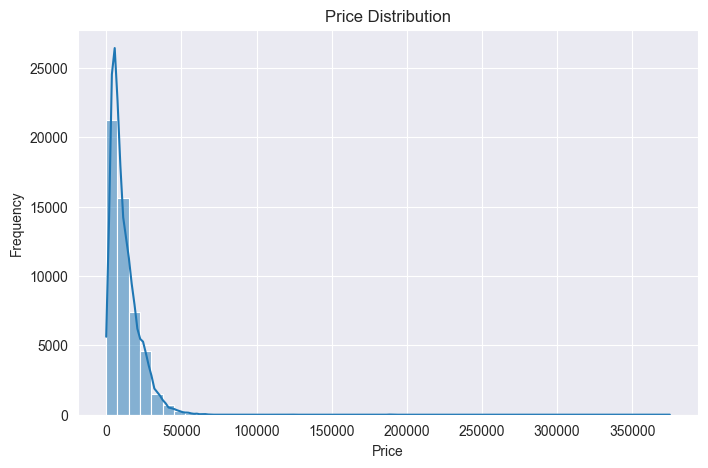

In [22]:
# Visualization Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df_vehicles['price'], bins=50, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

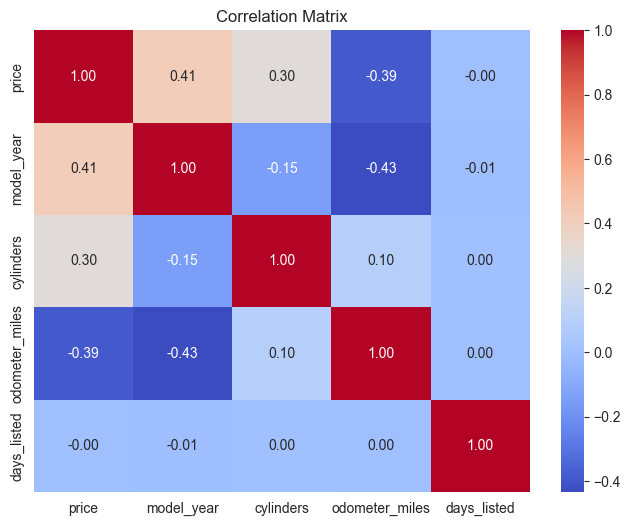

In [23]:
# Visualization heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_vehicles, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### Conclusion: Prices are right-skewed, and correlations confirm expected relationships.

In [24]:
df_vehicles.describe()

,price,model_year,cylinders,odometer_miles,listing_date,days_listed
count,51525.000000,51525.000000,51525.000000,51525.000000,51525,51525.00000
mean,12132.464920,2009.793557,6.121067,115246.276468,2018-10-25 01:57:46.270742528,39.55476
min,1.000000,1908.000000,3.000000,0.000000,2018-05-01 00:00:00,0.00000
25%,5000.000000,2007.000000,4.000000,77000.000000,2018-07-29 00:00:00,19.00000
50%,9000.000000,2011.000000,6.000000,115256.000000,2018-10-25 00:00:00,33.00000
75%,16839.000000,2014.000000,8.000000,148177.000000,2019-01-21 00:00:00,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,2019-04-19 00:00:00,271.00000
std,10040.803015,6.099381,1.657457,60701.689701,NaN,28.20427


In [25]:
df_vehicles[df_vehicles['price'] > 100000].shape[0]

17

### Conclusion:

    - Median price: $9,000.
    - 75% of cars cost ≤ $16,839, but the max price is $375,000, since our dataset contains some luxurious cars.
    - our std = $10,040 suggesting a wide price range.
    - the median model_year: 2011, most cars are relatively modern for when the dataset was collected "2019".
    - Some very old cars (1908) exist: classic cars? /mistake? should it be fixed?.
    - the median cylinders: 6, and high values are up to 12 cylinders (i don't know what it could mean). 
    - the median Odometer: 115,256 miles, which could mean that there is a high number of used cars in our dataset. With a minimum: 0, an error in our dataset?. 
    - max mileage: 990,000 miles. 
    - Median listing time: 33 days, and up to 271 days, possibly due to overpricing or low demand.

## First visual of our dataset

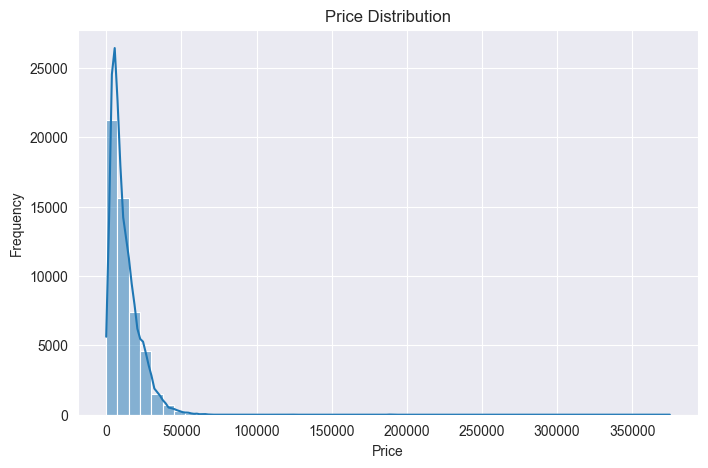

In [26]:
# Price Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df_vehicles['price'], bins=50, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

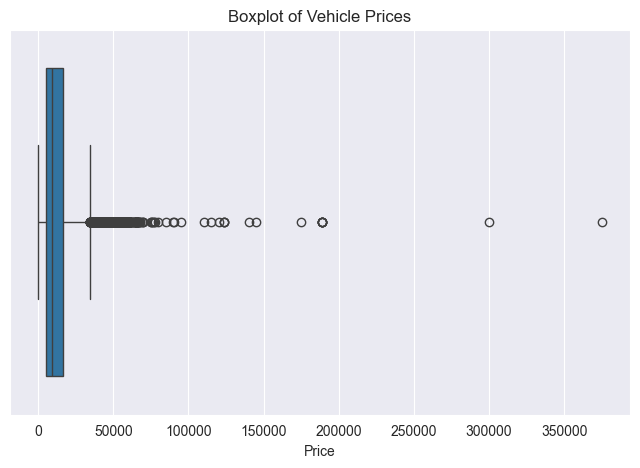

In [27]:
# Price BoxPlot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_vehicles['price'])
plt.title('Boxplot of Vehicle Prices')
plt.xlabel('Price')
plt.show()

**The price distribution** is right-skewed, which means that most cars are affordable.
our **mean** : $12,132$/ is higher than our **median**: $9,000$.

    -> a small number of luxury cars (17) are pulling up our average.

#### **Filter Out Luxury Cars**

In [28]:
# Filtering our data to exclude luxurious cars
#df_filtered = df_vehicles[df_vehicles['price'] <= 100000]
#df_filtered = df_vehicles[df_vehicles['price'] <= 90000]
#df_filtered = df_vehicles[df_vehicles['price'] <= 80000]
df_filtered = df_vehicles[df_vehicles['price'] <= 70000]
df_filtered.head(5).sort_values('price', ascending= False)

,price,model_year,model,condition,cylinders,fuel,odometer_miles,transmission,type,paint_color,is_4wd,listing_date,days_listed,make
1,25500,2011,f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,ford
4,14900,2017,200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,chrysler
0,9400,2011,x5,good,6,gas,145000,automatic,SUV,Unknown,True,2018-06-23,19,bmw
2,5500,2013,sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,hyundai
3,1500,2003,f-150,fair,8,gas,121928,automatic,pickup,Unknown,False,2019-03-22,9,ford


In [29]:
df_filtered.describe()

,price,model_year,cylinders,odometer_miles,listing_date,days_listed
count,51497.000000,51497.000000,51497.000000,51497.000000,51497,51497.000000
mean,12063.674797,2009.793036,6.120512,115254.700487,2018-10-25 01:57:06.490863616,39.555023
min,1.000000,1908.000000,3.000000,0.000000,2018-05-01 00:00:00,0.000000
25%,5000.000000,2007.000000,4.000000,77000.000000,2018-07-29 00:00:00,19.000000
50%,9000.000000,2011.000000,6.000000,115241.000000,2018-10-25 00:00:00,33.000000
75%,16800.000000,2014.000000,8.000000,148177.000000,2019-01-21 00:00:00,53.000000
max,70000.000000,2019.000000,12.000000,990000.000000,2019-04-19 00:00:00,271.000000
std,9460.467945,6.099236,1.657575,60692.878424,NaN,28.207269


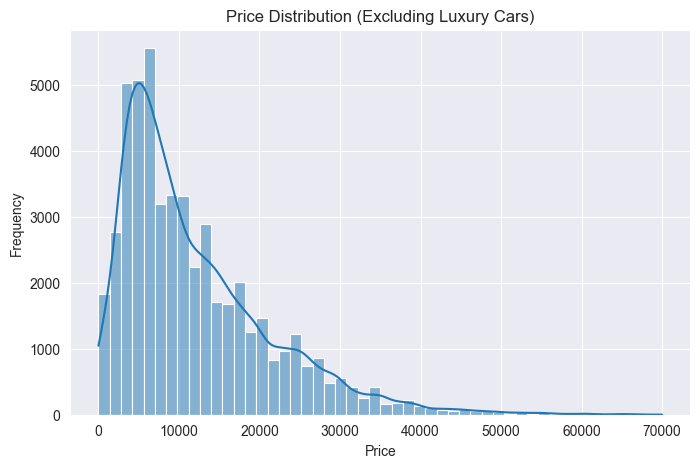

In [30]:
# price distribution plot without luxury cars
plt.figure(figsize=(8, 5))
sns.histplot(df_filtered['price'], bins=50, kde=True)
plt.title('Price Distribution (Excluding Luxury Cars)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

**Question to the Reviewer**:

    - how can i make the plot more dynamic? was hoping to set like a scroll or slide to change the price treshhold? sorry to ask, I wasnt able to find a good solution online. 
    - also, could you please help understand which plots were unnecessary for this dataset? a tip/trick or two to ameliorate my plots? thank you
    - I stopped updating streamlit/render for now, to be able to move forward on my bootcamp

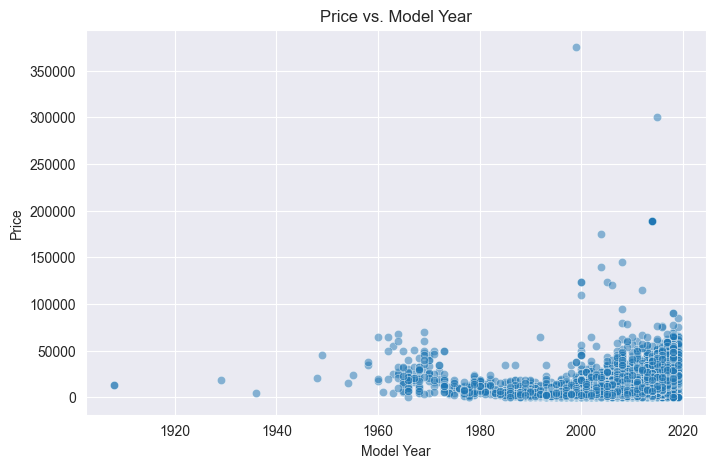

In [31]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_vehicles['model_year'], y=df_vehicles['price'], alpha=0.5)
plt.title('Price vs. Model Year')
plt.xlabel('Model Year')
plt.ylabel('Price')
plt.show()

**This plot helps confirming that older cars are cheaper**

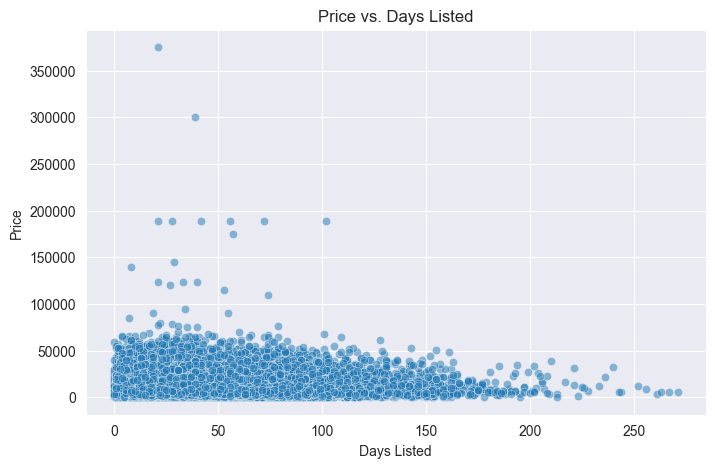

In [32]:
# price vs days Listed
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_vehicles['days_listed'], y=df_vehicles['price'], alpha=0.5)
plt.title('Price vs. Days Listed')
plt.xlabel('Days Listed')
plt.ylabel('Price')
plt.show()

### conslusion:
    - unlike what was expected, the price vs days Listed plot shows that expensive cars tend to be sold more quickly, whereas older cars stay listed for a longer period. This contrasts with the initial hypothesis where we expected expensive cars stay listed longer due to lower demand.
    - This suggests that while the age of a car correlates with its price, other factors like market demand or vehicle condition could influence the listing duration more significantly than price alone.

## Feature Engineering

In [33]:
# New Columns 
df_vehicles['car_age'] = df_vehicles['model_year'].max() - df_vehicles['model_year']
df_vehicles['price_per_mile'] = df_vehicles['price'] / df_vehicles['odometer_miles']
df_vehicles['price_per_mile'].replace([np.inf, -np.inf], np.nan)
df_vehicles['high_mileage'] = df_vehicles['odometer_miles'].apply(lambda x: 1 if x > 150000 else 0)
df_vehicles.head()

df_vehicles['high_mileage'] = df_vehicles['high_mileage'].map({1: 'Yes', 0: 'No'})

### Conclusion: New features (car age, price per mile, and high mileage flag) provide additional insights into the dataset.

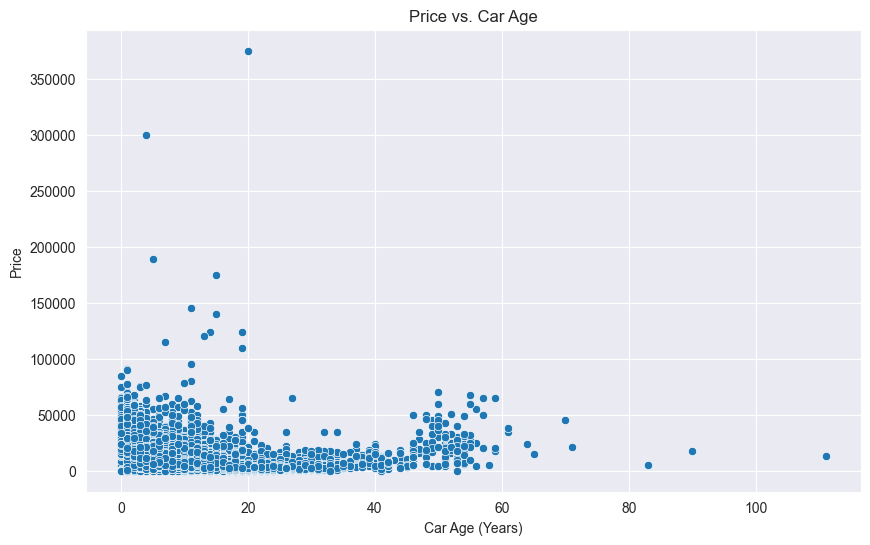

In [34]:
# price vs car age plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='car_age', y='price', data=df_vehicles)
plt.title('Price vs. Car Age')
plt.xlabel('Car Age (Years)')
plt.ylabel('Price')
plt.show()

### conclusion: this plot helps confirming again that older cars are cheaper

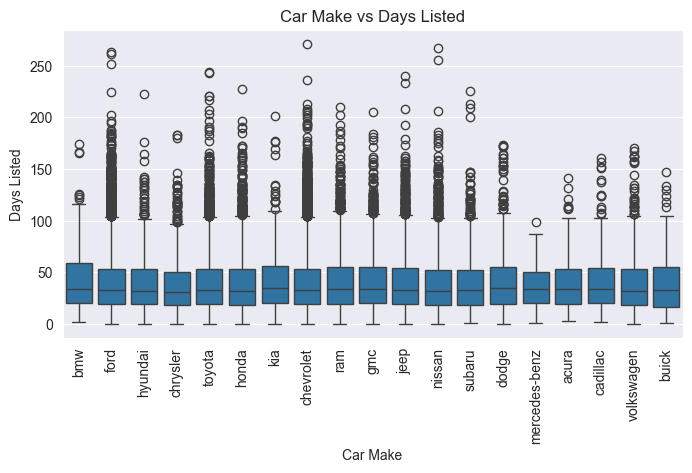

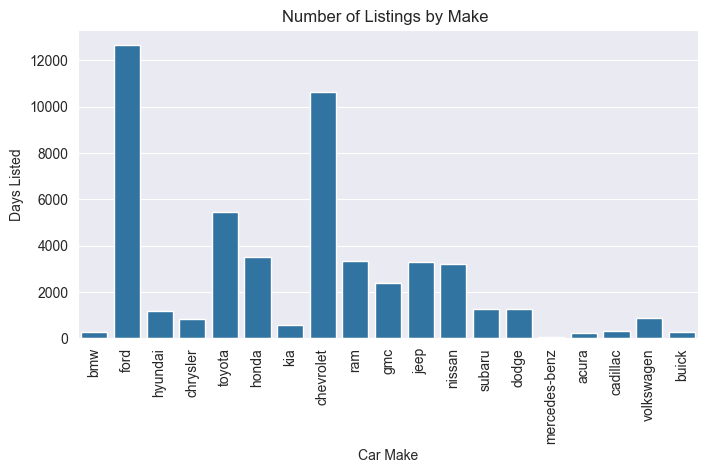

In [35]:
# make vs days listed boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(x='make', y='days_listed', data=df_vehicles)
plt.title('Car Make vs Days Listed')
plt.xlabel('Car Make')
plt.ylabel('Days Listed')
plt.xticks(rotation=90)
plt.show()

# number of listings for each car make countplot
plt.figure(figsize=(8, 4))
sns.countplot(x='make', data=df_vehicles)
plt.title('Number of Listings by Make ')
plt.xlabel('Car Make')
plt.ylabel('Days Listed')
plt.xticks(rotation=90)
plt.show()

### conclusion:
    - the boxplot helped confirming that luxurious cars, like mercedes, or bmw, take lesser time to sell.
    - the countplot shows that some makes like ford or chevrolet, have higher numbers of listings, potentially affecting the "days_listed" data.

# Summary

### Initial Dataset:
    *Description:
        - our dataset consisted 51525 entries of vehicles information, which included: price, model_year, model, condition, cylinders, fuel, odometer, transmission, type, paint_color, is_4wd, date_posted, days_listed.

     *Initial hypotheses:
         - the following initial hypotheses were formed:
             - Newer, luxurious, and the model year will tend to have higher prices.
             - cheaper cars will tend to sell faster.

    *Analysis methods:
        - To validate these hypothesis, these were the  applied methods:
            - Descriptive statistics: a summary statistics using describe() to understand the general distribution of our data, including the mean, median, and standard deviation.
            - Correlation analysis: To quantify relationships between numerical variables. This helped identify potential linear relationships.
            - Feature Engineering:
                - adding newer columns like: care age, price per mile or high mileage. 
            - Visualization: 
                - Histograms: to assess the distribution of variables, providing insights into skewness and range of values.
                - Scatterplots: to visualize relationships between pairs of continuous variables. 
                - Countplot: to visualize categorical variables.
                - Boxplot: 
            
    *Final findings:
        - Price vs model year: there is a positive correlation between price and model year (r = 0.43) -> newer cars tend to be more expensive.
        - Price vs cylinders: moderate positive correlation (r = 0.30) found -> more cylinders can lead to higher prices.
        - Price vs odometer Miles: negative correlation (r = -0.42) -> suggests that vehicles with higher mileage have lower prices.
        - Price Distribution: price distribution was right-skewed -> most cars are priced lower, with only a few expensive ones.
        - Price vs listing duration: older cars stay listed longer, while luxurious cars are sold quicker. 

## Enhancing analysis 
    more strategies and techniques could have been applied, which were not used in our dataset:
    - Condition of vehicle: could have helped explain some price variance. 
    - Time-based analysis: I could have analysed more efectively our data considering seasonal fluctuations? which I didn't. 
    - advanced statistical analysis: using linear regressions, covariance... 
   

##### removed unused Dataset
    - additional dataset was loaded in the notebook but is not used in my_app.py.
    - does not impact the final analysis or application functionality.